In [1]:
import warnings
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import re
import unicodedata

In [3]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    | Downloading pa

True

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
filepath = "/kaggle/input/englishportuguese-translation/por.txt"

In [6]:
df = pd.read_csv(filepath, sep="\t", names=["En", "Pt", "NAN"])[["En", "Pt"]]

In [7]:
df.head()

,En,Pt
0,Go.,Vai.
1,Go.,Vá.
2,Hi.,Oi.
3,Run!,Corre!
4,Run!,Corra!


In [8]:
df.shape

(168903, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168903 entries, 0 to 168902
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   En      168903 non-null  object
 1   Pt      168903 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [10]:
df.duplicated().sum()

0

In [11]:
df = df.sample(frac = 1).reset_index(drop=True)

In [12]:
df.head()

,En,Pt
0,Where's the bank?,Onde é o banco?
1,Could you help me do that?,Poderia me ajudar a fazer isso?
2,I hope it snows all night.,Espero que neve a noite inteira.
3,"What's your story, Tom?","Qual é a sua história, Tom?"
4,Tom says that he hates weddings.,Tom diz que odeia casamentos.


In [13]:
data = df[:100000]

In [14]:
data['Pt'] = data['Pt'].apply(lambda x: "<SOS> " + x + " <EOS>")

/tmp/ipykernel_32/492360838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pt'] = data['Pt'].apply(lambda x: "<SOS> " + x + " <EOS>")


In [15]:
data.head()

,En,Pt
0,Where's the bank?,<SOS> Onde é o banco? <EOS>
1,Could you help me do that?,<SOS> Poderia me ajudar a fazer isso? <EOS>
2,I hope it snows all night.,<SOS> Espero que neve a noite inteira. <EOS>
3,"What's your story, Tom?","<SOS> Qual é a sua história, Tom? <EOS>"
4,Tom says that he hates weddings.,<SOS> Tom diz que odeia casamentos. <EOS>


In [16]:
def eng_preprocess(text):
    text = text.lower()
    text = re.sub(re.compile(r'[^a-zA-Z0-9\s]'), '', text)
    text = nltk.word_tokenize(text)
    text = " ".join([i.strip() for i in text])
    return text


def pt_preprocess(text):
    text = text.replace("\u202f"," ")
    text = text.lower()
    text = re.sub(re.compile("[^a-zéâàçêêëôîû!?',]"), ' ', text)
    return text

In [17]:
data['En'] = data['En'].apply(lambda x: eng_preprocess(x))

/tmp/ipykernel_32/2780957150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['En'] = data['En'].apply(lambda x: eng_preprocess(x))


In [18]:
data.head()

,En,Pt
0,wheres the bank,<SOS> Onde é o banco? <EOS>
1,could you help me do that,<SOS> Poderia me ajudar a fazer isso? <EOS>
2,i hope it snows all night,<SOS> Espero que neve a noite inteira. <EOS>
3,whats your story tom,"<SOS> Qual é a sua história, Tom? <EOS>"
4,tom says that he hates weddings,<SOS> Tom diz que odeia casamentos. <EOS>


In [19]:
data['Pt'] = data['Pt'].apply(lambda x: pt_preprocess(x))

/tmp/ipykernel_32/3347265495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pt'] = data['Pt'].apply(lambda x: pt_preprocess(x))


In [20]:
data.head()

,En,Pt
0,wheres the bank,sos onde é o banco? eos
1,could you help me do that,sos poderia me ajudar a fazer isso? eos
2,i hope it snows all night,sos espero que neve a noite inteira eos
3,whats your story tom,"sos qual é a sua hist ria, tom? eos"
4,tom says that he hates weddings,sos tom diz que odeia casamentos eos


In [21]:
def feature_tokenization(feat):
    eng_token = Tokenizer()
    eng_token.fit_on_texts(feat)
    eng_seq = eng_token.texts_to_sequences(feat)
    return eng_seq, eng_token



def target_tokenization(target):
    port_token = Tokenizer()
    port_token.fit_on_texts(target)
    port_seq = port_token.texts_to_sequences(target)
    return port_seq, port_token


In [22]:
eng_sequences, eng_token = feature_tokenization(data['En'])

In [23]:
eng_vocab = len(eng_token.word_index) + 1
eng_vocab

10809

In [24]:
eng_sequences[:5]

[[485, 5, 789],
 [114, 4, 70, 12, 9, 8],
 [2, 161, 17, 3692, 54, 200],
 [152, 30, 467, 1],
 [1, 317, 8, 15, 980, 2891]]

In [25]:
port_sequences, port_token = target_tokenization(data['Pt'])

In [26]:
port_vocab = len(port_token.word_index) + 1
port_vocab

16480

In [27]:
port_sequences[:5]

[[1, 71, 11, 3, 657, 2],
 [1, 159, 17, 133, 9, 24, 14, 2],
 [1, 162, 6, 833, 9, 121, 1030, 2],
 [1, 136, 11, 9, 56, 344, 240, 4, 2],
 [1, 4, 245, 6, 1115, 3470, 2]]

In [28]:
port_inp = [x[:-1] for x in port_sequences]
port_inp[:5]

[[1, 71, 11, 3, 657],
 [1, 159, 17, 133, 9, 24, 14],
 [1, 162, 6, 833, 9, 121, 1030],
 [1, 136, 11, 9, 56, 344, 240, 4],
 [1, 4, 245, 6, 1115, 3470]]

In [29]:
port_out = [x[1:] for x in port_sequences]
port_out[:5]

[[71, 11, 3, 657, 2],
 [159, 17, 133, 9, 24, 14, 2],
 [162, 6, 833, 9, 121, 1030, 2],
 [136, 11, 9, 56, 344, 240, 4, 2],
 [4, 245, 6, 1115, 3470, 2]]

In [30]:
def pad_seq(pad):
    return pad_sequences(pad, padding = "post")

In [31]:
encoder_input = pad_seq(eng_sequences)
encoder_input = tf.convert_to_tensor(encoder_input)
encoder_input

<tf.Tensor: shape=(100000, 35), dtype=int32, numpy=
array([[485,   5, 789, ...,   0,   0,   0],
       [114,   4,  70, ...,   0,   0,   0],
       [  2, 161,  17, ...,   0,   0,   0],
       ...,
       [ 17,  38, 263, ...,   0,   0,   0],
       [ 79,  86, 292, ...,   0,   0,   0],
       [320, 260,   3, ...,   0,   0,   0]], dtype=int32)>

In [32]:
encoder_input.shape

TensorShape([100000, 35])

In [33]:
decoder_input = pad_seq(port_inp)
decoder_input = tf.convert_to_tensor(decoder_input)
decoder_input

<tf.Tensor: shape=(100000, 34), dtype=int32, numpy=
array([[  1,  71,  11, ...,   0,   0,   0],
       [  1, 159,  17, ...,   0,   0,   0],
       [  1, 162,   6, ...,   0,   0,   0],
       ...,
       [  1,  67, 363, ...,   0,   0,   0],
       [  1,   7,  43, ...,   0,   0,   0],
       [  1,  98, 369, ...,   0,   0,   0]], dtype=int32)>

In [34]:
decoder_input.shape

TensorShape([100000, 34])

In [35]:
decoder_output = pad_seq(port_out)
decoder_output = tf.convert_to_tensor(decoder_output)
decoder_output

<tf.Tensor: shape=(100000, 34), dtype=int32, numpy=
array([[  71,   11,    3, ...,    0,    0,    0],
       [ 159,   17,  133, ...,    0,    0,    0],
       [ 162,    6,  833, ...,    0,    0,    0],
       ...,
       [  67,  363,   18, ...,    0,    0,    0],
       [   7,   43, 2163, ...,    0,    0,    0],
       [  98,  369,  246, ...,    0,    0,    0]], dtype=int32)>

In [36]:
decoder_output.shape

TensorShape([100000, 34])

In [37]:
eng_vocab = eng_vocab
port_vocab = port_vocab

eng_seq_len = encoder_input.shape[1]
port_seq_len = decoder_input.shape[1]

embed_dim = 180
hidden_dim = 128

num_heads = 6
head_dim = embed_dim//num_heads

num_blocks = 4

In [38]:
class positional_embedding(tf.keras.layers.Layer):
    
    def __init__(self, vocab, sequence, embedding_dim, **kwargs):
        super().__init__(**kwargs)
        
        self.vocab = vocab
        self.sequence = sequence
        self.embedding_dim = embedding_dim
        
        self.embedding_layer = tf.keras.layers.Embedding(input_dim=self.vocab, output_dim=self.embedding_dim, input_length=self.sequence)
        self.positional_encoding = tf.keras.layers.Embedding(self.sequence, self.embedding_dim)


    def call(self, inputs):
        pos_ids = tf.range(self.sequence)
        token_embed = self.embedding_layer(inputs)
        token_positional = self.positional_encoding(pos_ids)
        final = token_embed + token_positional
        return  final

In [39]:
class padding_mask(tf.keras.layers.Layer):
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
    def call(self, inputs):
        mask = tf.cast(tf.math.not_equal(inputs, 0), tf.float32)
        mask = mask[:, tf.newaxis, :]
        return mask

In [40]:
class look_ahead_mask(tf.keras.layers.Layer):
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
        self.mask = padding_mask()
        
    def call(self, inputs, sequence):
        masked = self.mask(inputs)
        look = tf.linalg.band_part(tf.ones((1, sequence, sequence)), -1, 0)
        dec_mask = tf.minimum(masked,look)
        return dec_mask

In [41]:
class encoder_layer(tf.keras.layers.Layer):
    
    def __init__(self, num_heads, embedding_dim, hidden_dim, dropout_rate = 0.0, **kwargs):
        super().__init__(**kwargs)
        
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim, dropout=dropout_rate)
        self.norm1 = tf.keras.layers.LayerNormalization()
        self.norm2 = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()
        self.drop1 = tf.keras.layers.Dropout(dropout_rate)
        self.drop2 = tf.keras.layers.Dropout(dropout_rate)
        
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden_dim,activation="relu"),
            tf.keras.layers.Dense(hidden_dim,activation="relu"),
            tf.keras.layers.Dense(embedding_dim,activation="relu"),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        
        
    def call(self, enc_inputs, enc_mask, training):
        
        mha_out1 = self.mha(enc_inputs, enc_inputs, enc_inputs, enc_mask)
        drop_out1 = self.drop1(mha_out1, training = training)
        norm_out1 = self.norm1(self.add([drop_out1,enc_inputs]))

        ffn_out = self.ffn(norm_out1)
        drop_out2 = self.drop2(ffn_out, training = training)
        final = self.norm2(self.add([drop_out2, norm_out1]))

        return final
        

In [42]:
class Encoder(tf.keras.layers.Layer):
    
    def __init__(self, vocab, sequence, embedding_dim, num_heads, hidden_dim, num_blocks, dropout_rate = 0.0, **kwargs):
        super().__init__(**kwargs)
        
        self.pos = positional_embedding(vocab, sequence, embedding_dim)
        self.mask = padding_mask()
        self.encoder = [encoder_layer(num_heads, embedding_dim, hidden_dim) for i in range(num_blocks)]
        self.add = tf.keras.layers.Add()
        
    def call(self, inputs, training):
        emb = self.pos(inputs)
        mask = self.mask(inputs)
        temp = emb
        
        for blocks in self.encoder:
            emb = blocks(emb, mask, training)
            emb = self.add([temp, emb])
            temp = emb
            
        return emb, mask

In [43]:
class decoder_layer(tf.keras.layers.Layer):
    
    def __init__(self, num_heads, embedding_dim, hidden_dim, dropout_rate = 0.0, **kwargs):
        super().__init__(**kwargs)
        
        self.mha1 = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim, dropout=dropout_rate)
        self.mha2 = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim, dropout=dropout_rate)
        self.norm1 = tf.keras.layers.LayerNormalization()
        self.norm2 = tf.keras.layers.LayerNormalization()
        self.norm3 = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()
        self.drop1 = tf.keras.layers.Dropout(dropout_rate)
        self.drop2 = tf.keras.layers.Dropout(dropout_rate)
        self.drop3 = tf.keras.layers.Dropout(dropout_rate)
        
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden_dim,activation="relu"),
            tf.keras.layers.Dense(hidden_dim,activation="relu"),
            tf.keras.layers.Dense(embedding_dim,activation="relu"),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        
        
    def call(self, dec_inputs, enc_outputs, dec_mask, enc_mask, training):
        
        mha_out1 = self.mha1(dec_inputs, dec_inputs, dec_inputs, dec_mask)
        drop_out1 = self.drop1(mha_out1, training = training)
        norm_out1 = self.norm1(self.add([drop_out1,dec_inputs]))
        
        mha_out2 = self.mha2(norm_out1, enc_outputs, enc_outputs, enc_mask)
        drop_out2 = self.drop2(mha_out2, training = training)
        norm_out2 = self.norm2(self.add([drop_out2, norm_out1]))    

        ffn_out = self.ffn(norm_out2)
        drop_out3 = self.drop3(ffn_out, training = training)
        final = self.norm3(self.add([drop_out3, norm_out2]))

        return final
        

In [44]:
class Decoder(tf.keras.layers.Layer):
    
    def __init__(self, vocab, sequence, embedding_dim, num_heads, hidden_dim, num_blocks, dropout_rate = 0.1, **kwargs):
        super().__init__(**kwargs)
        
        self.sequence_length = sequence
        
        self.pos = positional_embedding(vocab, sequence, embedding_dim)
        self.look = look_ahead_mask()
        self.decoder = [decoder_layer(num_heads, embedding_dim, hidden_dim) for i in range(num_blocks)]
        self.add = tf.keras.layers.Add()
        
    def call(self, dec_inputs, encoder_outputs, enc_mask, training):
        emb = self.pos(dec_inputs)
        mask = self.look(dec_inputs, self.sequence_length)
        temp = emb
        
        for blocks in self.decoder:
            emb = blocks(emb, encoder_outputs, mask, enc_mask, training)
            emb = self.add([temp, emb])
            temp = emb
            
        return emb

In [45]:
class Transformer(tf.keras.Model):
    
    def __init__(self, eng_vocab, port_vocab, eng_seq_len, port_seq_len, embedding_dim, hidden_dim, num_heads, num_blocks, dropout_rate = 0.1, **kwargs):
        super().__init__(**kwargs)
        
        self.encoder = Encoder(eng_vocab, eng_seq_len, embedding_dim, num_heads, hidden_dim, num_blocks)
        self.decoder = Decoder(port_vocab, port_seq_len, embedding_dim, num_heads, hidden_dim, num_blocks)
        
        self.Final_layer = tf.keras.layers.Dense(port_vocab, activation='relu')
        self.softmax = tf.keras.layers.Softmax(axis=-1)
        
    def call(self, inputs):
        enc_inputs, dec_inputs = inputs
        
        encoder_out, enc_mask = self.encoder(enc_inputs)
        decoder_out = self.decoder(dec_inputs, encoder_out, enc_mask)
        
        final = self.Final_layer(decoder_out)
        softmaxed = self.softmax(final)
        
        return softmaxed

In [46]:
transformers = Transformer(eng_vocab, port_vocab, eng_seq_len, port_seq_len, embed_dim, hidden_dim, num_heads, num_blocks)

In [47]:
trans_out = transformers((encoder_input[:1], decoder_input[:1]))

In [48]:
trans_out

<tf.Tensor: shape=(1, 34, 16480), dtype=float32, numpy=
array([[[4.52091335e-05, 4.52091335e-05, 4.66049642e-05, ...,
         8.54002792e-05, 4.52091335e-05, 1.02920494e-04],
        [4.50421721e-05, 4.50421721e-05, 6.01664215e-05, ...,
         6.14246819e-05, 4.50421721e-05, 7.26224680e-05],
        [7.83204378e-05, 4.52504682e-05, 8.93999240e-05, ...,
         8.09578196e-05, 4.52504682e-05, 4.52504682e-05],
        ...,
        [8.52033263e-05, 4.62280623e-05, 1.45581449e-04, ...,
         7.78480244e-05, 6.14111777e-05, 6.87581414e-05],
        [4.59488074e-05, 5.43812966e-05, 7.03729456e-05, ...,
         4.53599168e-05, 4.86514145e-05, 6.38960264e-05],
        [7.09309315e-05, 4.54737310e-05, 1.00689402e-04, ...,
         4.54737310e-05, 8.49625794e-05, 5.89309675e-05]]], dtype=float32)>

In [49]:
transformers.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  5330480   
                                                                 
 decoder (Decoder)           multiple                  9476600   
                                                                 
 dense_24 (Dense)            multiple                  2982880   
                                                                 
 softmax (Softmax)           multiple                  0         
                                                                 
Total params: 17,789,960
Trainable params: 17,789,960
Non-trainable params: 0
_________________________________________________________________


In [50]:
transformers.get_build_config()

{'input_shape': ((1, 35), (1, 34))}

In [51]:
path = "/kaggle/working/model.keras"
transformers.save_weights(path)

In [52]:
compilation = transformers.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.RMSprop() ,metrics=["accuracy"])

In [53]:
calls = tf.keras.callbacks.EarlyStopping(patience = 5, verbose = True)

In [54]:
fitting = transformers.fit((encoder_input,decoder_input),decoder_output, validation_split=0.2, epochs = 100, batch_size = 500, verbose = True, callbacks = calls)

Epoch 1/100
160/160 [==============================] - 142s 717ms/step - loss: 1.5772 - accuracy: 0.8057 - val_loss: 0.9118 - val_accuracy: 0.8638
Epoch 2/100
160/160 [==============================] - 106s 661ms/step - loss: 0.6997 - accuracy: 0.8869 - val_loss: 0.5754 - val_accuracy: 0.9007
Epoch 3/100
160/160 [==============================] - 105s 658ms/step - loss: 0.4856 - accuracy: 0.9130 - val_loss: 0.4496 - val_accuracy: 0.9202
Epoch 4/100
160/160 [==============================] - 105s 657ms/step - loss: 0.3906 - accuracy: 0.9256 - val_loss: 0.4059 - val_accuracy: 0.9251
Epoch 5/100
160/160 [==============================] - 105s 657ms/step - loss: 0.3337 - accuracy: 0.9335 - val_loss: 0.3789 - val_accuracy: 0.9285
Epoch 6/100
160/160 [==============================] - 105s 655ms/step - loss: 0.2919 - accuracy: 0.9397 - val_loss: 0.3508 - val_accuracy: 0.9333
Epoch 7/100
160/160 [==============================] - 105s 655ms/step - loss: 0.2597 - accuracy: 0.9445 - val_loss: 0

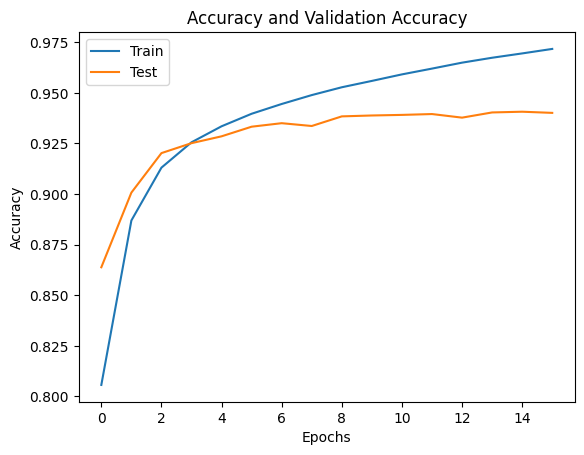

In [55]:
plt.plot(fitting.history['accuracy'])
plt.plot(fitting.history['val_accuracy'])
plt.title('Accuracy and Validation Accuracy')
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

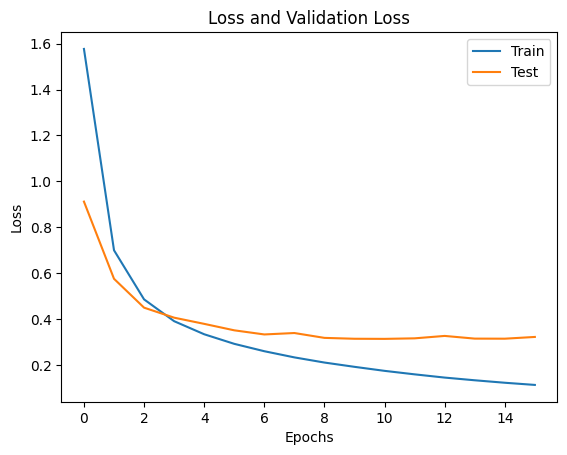

In [56]:
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.title('Loss and Validation Loss')
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [62]:
def prepare_inputs(sentences):
    input_tokenized = eng_token.texts_to_sequences([sentences])
    input_padded = pad_sequences(input_tokenized, padding='post', maxlen = eng_seq_len)
    input_tensor = tf.convert_to_tensor(input_padded, tf.int32)
    return input_tensor

In [58]:
def decode_process(d):
    ds = port_token.texts_to_sequences(d)
    dp = pad_sequences(ds, padding='post', maxlen = port_seq_len)
    dt = tf.convert_to_tensor(dp, tf.int32)
    return dt

In [59]:
decoder_end = ["<EOS>"]
end = port_token.texts_to_sequences(decoder_end)
end = tf.convert_to_tensor(end)
end = end[0]
end

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([2], dtype=int32)>

In [63]:
def translate(inputs):
    
    tt = prepare_inputs(inputs)
    d = ["<SOS>"]
    dt = decode_process(d)
    pred = np.argmax(transformers.predict((tt,dt), verbose=0), axis = -1)[0,0]
    d[0] = d[0] + " " + (port_token.sequences_to_texts(np.array([[pred]])))[0]

    for i in range(1, port_seq_len):
        dt = decode_process(d)
        pred = np.argmax(transformers.predict((tt,dt), verbose=0), axis = -1)[0,i]
        d[0] = d[0] + " " + (port_token.sequences_to_texts(np.array([[pred]])))[0]
    
        if pred == end:
            break
            
    return " ".join(d)

In [64]:
for i in range(5):
    print("English Sentence : ", data['En'][i])
    print("Original Portugal Sentence : ", data['Pt'][i])
    print("Predicted Sentence : ", translate(data["En"][i]))
    print("*" * 50)

English Sentence :  wheres the bank
Original Portugal Sentence :   sos  onde é o banco?  eos 
Predicted Sentence :  <SOS> onde est o banco eos
**************************************************
English Sentence :  could you help me do that
Original Portugal Sentence :   sos  poderia me ajudar a fazer isso?  eos 
Predicted Sentence :  <SOS> você poderia me ajudar a fazer isso eos
**************************************************
English Sentence :  i hope it snows all night
Original Portugal Sentence :   sos  espero que neve a noite inteira   eos 
Predicted Sentence :  <SOS> espero que neve a noite inteira eos
**************************************************
English Sentence :  whats your story tom
Original Portugal Sentence :   sos  qual é a sua hist ria, tom?  eos 
Predicted Sentence :  <SOS> qual sua hist ria tom eos
**************************************************
English Sentence :  tom says that he hates weddings
Original Portugal Sentence :   sos  tom diz que odeia casamento

In [ ]:
translate("do whatever he tells you")

# Thanking you all